# Binary Classification - Evaluation

* Topic: Parkinson's Disease
* Prompt: You are a neuroscience expert specializing in ion channel and current analysis. Given the following content:\n\n{file_content}\n\n Please identify whether this content contains relevant information about {topic}. If the answer is yes, please answer Y; otherwise, answer N. DO NOT analyze.

In [1]:
# utils
import pandas as pd
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# load results
OUTPUT_DIR = "binary_classification_test.json"
LABELS_DIR = "binary_labels_Parkinson.csv"

In [37]:
# main evaluation function
def eval_binary_test(OUTPUT_DIR, LABELS_DIR):
    df = pd.read_csv(LABELS_DIR)
    df["code"] = df["code"].astype(int)
    with open(OUTPUT_DIR, 'r', encoding='utf-8') as f:
        results_json = json.load(f)
    results_df = pd.DataFrame(list(results_json.items()), columns=["code", "result"])
    results_df["code"] = results_df["code"].astype(int)
    results_df["result"] = results_df["result"].map({"Y": 1, "N": 0})
    merged_df = pd.merge(results_df, df, on="code", how="left")
    # Calculate metrics
    accuracy = accuracy_score(merged_df["label"], merged_df["result"])
    precision = precision_score(merged_df["label"], merged_df["result"])
    recall = recall_score(merged_df["label"], merged_df["result"])
    f1 = f1_score(merged_df["label"], merged_df["result"])

    # Display results
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    # Compute confusion matrix
    cm = confusion_matrix(merged_df["label"], merged_df["result"], labels=[0, 1])

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return merged_df
    

## Experiment Parkinson's (Jan 20)

In [3]:
df = pd.read_csv(LABELS_DIR)
df["code"] = df["code"].astype(int)
df.head()

,code,label,file_id
0,64255,1,01W2ZTQFSDSKFOYYVSCJCIP3BP67N3FDEC
1,79465,1,01W2ZTQFTECH6N6Q62NJB2SBTMMDLJXNK7
2,79488,1,01W2ZTQFURO2OSVZBXLJHLDCUDBBYICD3E
3,83559,1,01W2ZTQFXO7GYLC4GQ4ZGJ4NCA5SPVJFMC
4,83560,1,01W2ZTQFUYVY66AYU6PFGLBZRLEZIUWRSR


In [4]:
with open(OUTPUT_DIR, 'r', encoding='utf-8') as f:
    results_json = json.load(f)
results_df = pd.DataFrame(list(results_json.items()), columns=["code", "result"])
results_df["code"] = results_df["code"].astype(int)
results_df["result"] = results_df["result"].map({"Y": 1, "N": 0})
results_df.head()

,code,result
0,64255,1
1,266901,0
2,83560,1
3,26997,0
4,140828,0


In [5]:
merged_df = pd.merge(results_df, df, on="code", how="left")
merged_df

,code,result,label,file_id
0,64255,1,1,01W2ZTQFSDSKFOYYVSCJCIP3BP67N3FDEC
1,266901,0,0,01W2ZTQFTDSG36VBQAJFBJIPIZGAC6MOAN
2,83560,1,1,01W2ZTQFUYVY66AYU6PFGLBZRLEZIUWRSR
3,26997,0,0,01W2ZTQFT7UWD7GWGH2BC23MUWHWNW5M4X
4,140828,0,0,01W2ZTQFQGMDDWWIP755AINO4DXGISNGKG
...,...,...,...,...
90,262431,0,1,01W2ZTQFQDM2C6ORDDDFG3RVGR2NSEZ5HR
91,266929,0,0,01W2ZTQFTQFP4AVDWZ7NGZMBXITSRQFHZ2
92,227005,0,0,01W2ZTQFXFFVQQAIKZENG2OR6NZYSKPMPR
93,20756,0,0,01W2ZTQFVD5ZXPLCVHVRAZCNVT44Z7PDS2


In [10]:
merged_df['label'].value_counts()

label
0    48
1    47
Name: count, dtype: int64

In [6]:
# Calculate metrics
accuracy = accuracy_score(merged_df["label"], merged_df["result"])
precision = precision_score(merged_df["label"], merged_df["result"])
recall = recall_score(merged_df["label"], merged_df["result"])
f1 = f1_score(merged_df["label"], merged_df["result"])

# Display results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Evaluation Metrics:
Accuracy: 0.84
Precision: 1.00
Recall: 0.68
F1 Score: 0.81


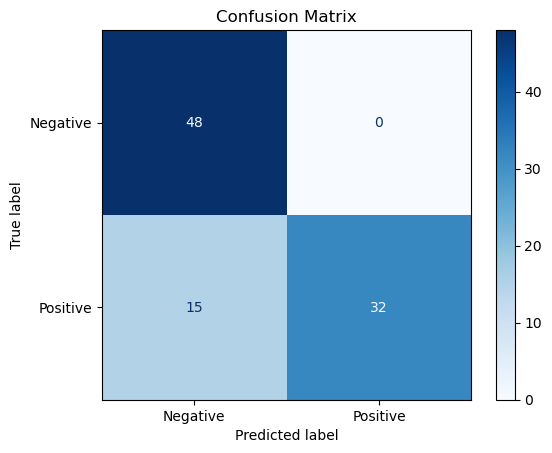

In [7]:
# Compute confusion matrix
cm = confusion_matrix(merged_df["label"], merged_df["result"], labels=[0, 1])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

False positive is 0, and therefore the precision is 1.00. However, the false negative is 15, and recall is 0.68.

In [14]:
# filter out the misclassified (false negatives)
merged_df[(merged_df['result'] == 0) & (merged_df['label'] == 1)]

,code,result,label,file_id
6,184491,0,1,01W2ZTQFXVTK2V32HGDVF2OIIC2CNOIXM2
8,119283,0,1,01W2ZTQFS2P633VGEUTBEL7QCRTCTJAWJF
20,98005,0,1,01W2ZTQFU4COL2HURGRRDZGCCWIDAPWF72
21,151460,0,1,01W2ZTQFWS6C2TPOK4WBCZJQRKXTEVZFRG
24,169984,0,1,01W2ZTQFQZZ2LVSNOEWZDZD7G52QAEAUZV
27,105385,0,1,01W2ZTQFW5JTV62DBL2ZH3AML5TP6GNTP4
34,137846,0,1,01W2ZTQFXTJZ5MAID2YBAIESWFJDNOVTBG
39,262046,0,1,01W2ZTQFUE3J4L2EZZINA2UJ2PIYH5PZFG
40,128874,0,1,01W2ZTQFTS7DQ32XUFHBGK5JKF262NBEB7
54,241160,0,1,01W2ZTQFR4BARNABM6MFA2ZYYMQDITTTBH


"id": 184491,<br>
"name": "Excessive beta oscillations in Parkinson's disease (Pavlides et al. 2015)
<br>
<br>
"id": 119283,<br>
"name": "Computational neuropharmacology of CA1 pyramidal neuron (Ferrante et al. 2008)",<br>
https://modeldb.science/api/v1/models/119283
<br>
<br>
"id": 98005,<br>
"name": "D2 dopamine receptor modulation of interneuronal activity (Maurice et al. 2004)",
<br>
<br>
 "id": 151460, <br>
  "name": "DBS of a multi-compartment model of subthalamic nucleus projection neurons (Miocinovic et al. 2006)",<br>
  related to deep brain simulation
<br>
<br>
"id": 169984, <br>
  "name": "Striatal NN model of MSNs and FSIs investigated effects of dopamine depletion (Damodaran et al 2015)",<br>
  related to dopamine pathway <br>



## Experiment - Additional concepts (Jan 28)

In [18]:
# utils
import pprint
from tqdm import tqdm
# openAI API
import os
from openai import OpenAI
from dotenv import load_dotenv

### Prompt and generated concept list

prompt: 
Can you give me a list of possible concepts that is related to Parkinson's disease? No need of any descriptions, just put all the concept names into a list.

output:

In [17]:
parkinsons_related_concepts = [
    "Basal Ganglia",
    "Substantia Nigra",
    "Dopamine",
    "Lewy Bodies",
    "Alpha-Synuclein",
    "Motor Circuitry",
    "Pacemaking Neurons",
    "Neuroinflammation",
    "Mitochondrial Dysfunction",
    "Oxidative Stress",
    "Synaptic Plasticity",
    "Neuronal Excitability",
    "Nav1.6",
    "HCN",
    "Tremor",
    "Bradykinesia",
    "Rigidity",
    "Postural Instability",
    "Gait Abnormalities",
    "Cognitive Decline",
    "Parkinson's-related Dementia",
    "Mood Disorders",
    "Depression",
    "Anxiety",
    "Sleep Disturbances",
    "REM Sleep Behavior Disorder",
    "Insomnia",
    "Autonomic Dysfunctions",
    "Constipation",
    "Orthostatic Hypotension",
    "Olfactory Dysfunction",
    "Dopaminergic Pathway",
    "Nigrostriatal Pathway",
    "Ubiquitin-Proteasome System",
    "Lysosomal Pathways",
    "Autophagy",
    "Calcium Homeostasis",
    "mTOR Pathway",
    "Glutamatergic System",
    "GABAergic System",
    "LRRK2",
    "SNCA",
    "PINK1",
    "Parkin",
    "DJ-1",
    "GBA",
    "Levodopa (L-DOPA)",
    "Dopamine Agonists",
    "Deep Brain Stimulation (DBS)",
    "MAO-B Inhibitors",
    "Gene Therapy",
    "Neuroprotective Strategies",
    "Toxins",
    "Pesticides",
    "Heavy Metals",
    "MPTP Neurotoxin",
    "Trauma",
    "Head Injuries",
    "Exercise",
    "Diet",
    "Antioxidants",
    "Gut Microbiome",
    "Rodent Models",
    "Alpha-Synuclein Models",
    "MPTP-Induced Models"
]


In [19]:
def run_additional_concept(para, concepts):
    results = {}
    client = OpenAI(api_key=para["api_key"], organization=para["organization"])
    topic = para["topic"] 
    for entry in tqdm(os.listdir(para["input_dir"])):
        full_path = os.path.join(para["input_dir"], entry)
        code = entry.split('_')[0]
        with open(full_path, 'r', encoding='utf-8') as file:
            file_content = file.read()
            file_content = file_content[:5000]
        prompt = (
            f"You are a neuroscience expert. "
            f"Given the following content:\n\n{file_content}\n\n"
            f"Please identify whether this content contains relevant information about {topic}."
            f"Note this additional concept list {concepts}. If you find the content before is related to this concept list, it is also considered as containing relevant information about {topic}."
            f"If the answer is yes, please answer Y; otherwise, answer N. DO NOT analyze."
        )
        chat_completion = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
        )

        response_dict = chat_completion.to_dict()
        results[code] = response_dict["choices"][0]["message"]["content"]

    with open(para["output_dir"], 'w', encoding='utf-8') as json_file:
        json.dump(results, json_file, ensure_ascii=False, indent=4)

In [20]:
load_dotenv()
para = {
    "api_key": os.getenv('API_KEY'),
    "organization": os.getenv('ORGANIZATION'),
    "topic": "Parkinson's",
    "input_dir": "../sampleParkinsons/match_file",
    "output_dir": "binary_classification_test_added.json"
}


In [21]:
run_additional_concept(para, parkinsons_related_concepts)

100%|██████████| 95/95 [02:38<00:00,  1.66s/it]


Evaluation Metrics:
Accuracy: 0.91
Precision: 0.95
Recall: 0.85
F1 Score: 0.90


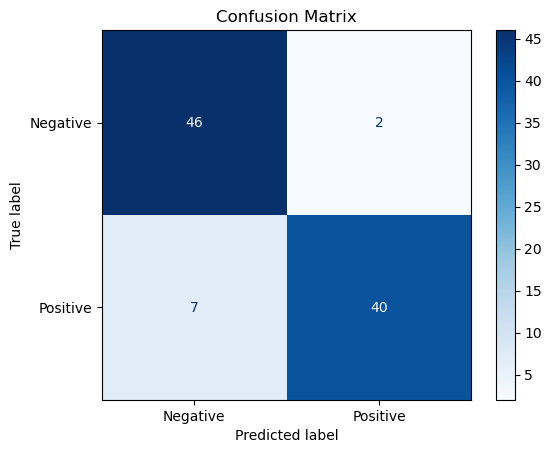

,code,result,label,file_id
0,64255,1,1,01W2ZTQFSDSKFOYYVSCJCIP3BP67N3FDEC
1,266901,0,0,01W2ZTQFTDSG36VBQAJFBJIPIZGAC6MOAN
2,83560,1,1,01W2ZTQFUYVY66AYU6PFGLBZRLEZIUWRSR
3,26997,0,0,01W2ZTQFT7UWD7GWGH2BC23MUWHWNW5M4X
4,140828,0,0,01W2ZTQFQGMDDWWIP755AINO4DXGISNGKG
...,...,...,...,...
90,262431,1,1,01W2ZTQFQDM2C6ORDDDFG3RVGR2NSEZ5HR
91,266929,0,0,01W2ZTQFTQFP4AVDWZ7NGZMBXITSRQFHZ2
92,227005,0,0,01W2ZTQFXFFVQQAIKZENG2OR6NZYSKPMPR
93,20756,0,0,01W2ZTQFVD5ZXPLCVHVRAZCNVT44Z7PDS2


In [36]:
OUTPUT_DIR = "parkinson_results/binary_classification_test_added.json"
LABELS_DIR = "binary_labels_Parkinson.csv"

eval_binary_test(OUTPUT_DIR, LABELS_DIR)

### Chain of question asking concept list

In [27]:
def run_additional_concept(para):
    results = {}
    client = OpenAI(api_key=para["api_key"], organization=para["organization"])
    topic = para["topic"] 
    for entry in tqdm(os.listdir(para["input_dir"])):
        full_path = os.path.join(para["input_dir"], entry)
        code = entry.split('_')[0]
        with open(full_path, 'r', encoding='utf-8') as file:
            file_content = file.read()
            file_content = file_content[:5000]
        prompt = (
            f"You are a neuroscience expert. Firstly, think about a list of possible concepts that is related to {topic} (No need to print out the answer)."
            f"Given the following content:\n\n{file_content}\n\n"
            f"Please identify whether this content contains relevant information about {topic}."
            f"Note that if you find the content is related to the possible concept list you have in the first step, it is also considered as containing relevant information about {topic}."
            f"If the answer is yes, please answer Y; otherwise, answer N. DO NOT analyze."
        )
        chat_completion = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
        )

        response_dict = chat_completion.to_dict()
        results[code] = response_dict["choices"][0]["message"]["content"]

    with open(para["output_dir"], 'w', encoding='utf-8') as json_file:
        json.dump(results, json_file, ensure_ascii=False, indent=4)


In [28]:
load_dotenv()
para = {
    "api_key": os.getenv('API_KEY'),
    "organization": os.getenv('ORGANIZATION'),
    "topic": "Parkinson's",
    "input_dir": "../sampleParkinsons/match_file",
    "output_dir": "binary_classification_test_2.json"
}
run_additional_concept(para)

100%|██████████| 95/95 [01:16<00:00,  1.25it/s]


Evaluation Metrics:
Accuracy: 0.94
Precision: 0.96
Recall: 0.91
F1 Score: 0.93


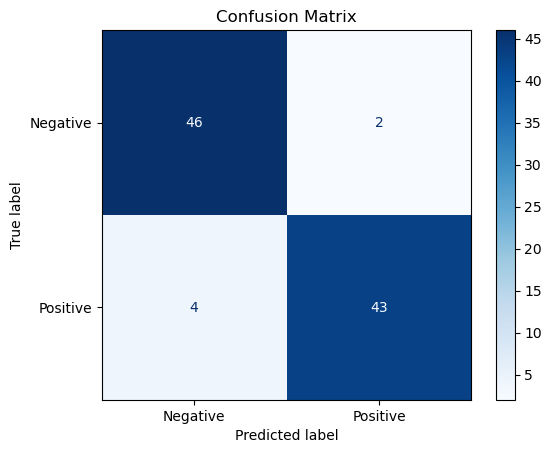

In [34]:
OUTPUT_DIR = "parkinson_results/binary_classification_test_2.json"
LABELS_DIR = "binary_labels_Parkinson.csv"

merged_df = eval_binary_test(OUTPUT_DIR, LABELS_DIR)

In [35]:
# filter out the misclassified (false negatives)
merged_df[(merged_df['result'] == 0) & (merged_df['label'] == 1)]

,code,result,label,file_id
6,184491,0,1,01W2ZTQFXVTK2V32HGDVF2OIIC2CNOIXM2
8,119283,0,1,01W2ZTQFS2P633VGEUTBEL7QCRTCTJAWJF
21,151460,0,1,01W2ZTQFWS6C2TPOK4WBCZJQRKXTEVZFRG
71,150556,0,1,01W2ZTQFWJWSZ4AKB7DNHICVRXB6VLHDNV


In [33]:
# filter out the misclassified (false positives)
merged_df[(merged_df['result'] == 1) & (merged_df['label'] == 0)]

,code,result,label,file_id
59,266732,1,0,01W2ZTQFTITW575DDT6RGYYAAS4J6IHZXY
93,20756,1,0,01W2ZTQFVD5ZXPLCVHVRAZCNVT44Z7PDS2


## Experiment (Alzheimer's)

In [44]:
load_dotenv()
para = {
    "api_key": os.getenv('API_KEY'),
    "organization": os.getenv('ORGANIZATION'),
    "topic": "Aging or Alzheimer`s disease",
    "input_dir": "../sampleAlzheimer/match_file",
    "output_dir": "alzheimer_results/binary_classification_test_1.json"
}
run_additional_concept(para)

100%|██████████| 31/31 [00:26<00:00,  1.17it/s]


Evaluation Metrics:
Accuracy: 0.68
Precision: 1.00
Recall: 0.38
F1 Score: 0.55


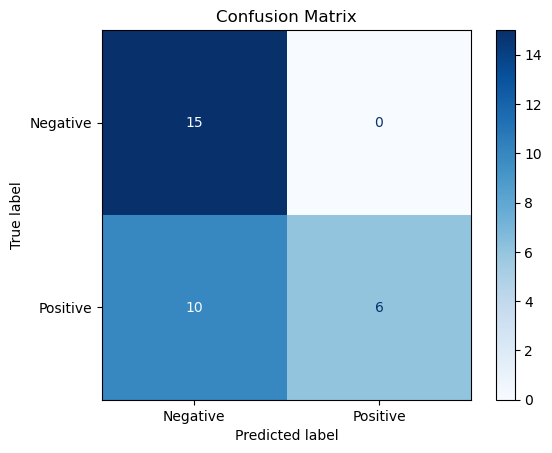

In [45]:
OUTPUT_DIR = para['output_dir']
LABELS_DIR = "binary_labels_Alzheimer.csv"

merged_df = eval_binary_test(OUTPUT_DIR, LABELS_DIR)

In [ ]:
alzheimer_related_concepts = [
    "Amyloid-beta plaques",
    "Tau protein",
    "Neurofibrillary tangles",
    "Cognitive decline",
    "Memory loss",
    "Dementia",
    "Cholinergic dysfunction",
    "Oxidative stress",
    "Neuroinflammation",
    "Synaptic loss",
    "Mild cognitive impairment",
    "Hippocampal atrophy",
    "Beta-secretase (BACE1)",
    "Gamma-secretase",
    "Amyloid precursor protein (APP)",
    "APOE ε4 allele",
    "Blood-brain barrier dysfunction",
    "Glutamate excitotoxicity",
    "Microglial activation",
    "Vascular dementia",
    "Acetylcholinesterase inhibitors",
    "NMDA receptor antagonists",
    "Cerebrovascular disease",
    "Neurodegeneration",
    "Lifestyle interventions",
    "Brain insulin resistance",
    "Neuroprotective agents",
    "Familial Alzheimer's disease",
    "Sporadic Alzheimer's disease",
    "Lewy bodies",
    "Neuropsychiatric symptoms",
    "White matter lesions",
    "Chronic traumatic encephalopathy",
    "Genetic risk factors",
    "Presenilin mutations",
    "Age-related cognitive decline",
    "Calcium homeostasis",
    "Inflammatory cytokines",
    "Lipid metabolism",
    "Axonal transport deficits",
    "Behavioral disturbances",
    "Mental stimulation",
    "Exercise and Alzheimer's prevention",
    "Sleep disturbances",
    "Alzheimer's biomarkers",
    "CSF tau levels",
    "CSF amyloid-beta levels",
    "PET imaging",
    "Functional MRI",
    "Cognitive reserve",
    "Neuroplasticity",
    "Environmental factors",
    "Chronic stress",
    "Glymphatic system dysfunction"
]


In [ ]:
def run_additional_concept(para, concepts):
    results = {}
    client = OpenAI(api_key=para["api_key"], organization=para["organization"])
    topic = para["topic"] 
    for entry in tqdm(os.listdir(para["input_dir"])):
        full_path = os.path.join(para["input_dir"], entry)
        code = entry.split('_')[0]
        with open(full_path, 'r', encoding='utf-8') as file:
            file_content = file.read()
            file_content = file_content[:5000]
        prompt = (
            f"You are a neuroscience expert. "
            f"Given the following content:\n\n{file_content}\n\n"
            f"Please identify whether this content contains relevant information about {topic}."
            f"Note this additional concept list {concepts}. If you find the content before is related to this concept list, it is also considered as containing relevant information about {topic}."
            f"If the answer is yes, please answer Y; otherwise, answer N. DO NOT analyze."
        )
        chat_completion = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
        )

        response_dict = chat_completion.to_dict()
        results[code] = response_dict["choices"][0]["message"]["content"]

    with open(para["output_dir"], 'w', encoding='utf-8') as json_file:
        json.dump(results, json_file, ensure_ascii=False, indent=4)

run_additional_concept(para, parkinsons_related_concepts)